# Toy Model

### Explanation
This notebook shows the preparation of data for the ML algorythm. It produces a file containing positions and momenta of photons and a flag stating their success/failure in arriving to the interest region.

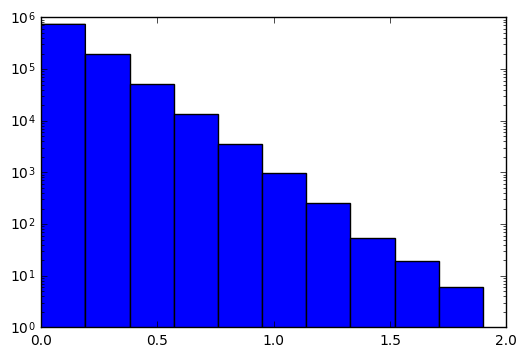

In [12]:
%matplotlib inline
from scipy.stats import expon

mu = 7 # mass absorption coefficient

d = expon.rvs(size=1000000)

plt.hist(d/mu);
plt.yscale('log')

### ModelA: no absorption

In [2]:
def function(N, R=0.1, a=1., b=.2):
    # Return N particles' momenta, dircosines and success/arrival flag
    # for the 2D square, with isotropic source in center and mu coeff.
    
    do = a/2 - b
    no = np.vstack(N*(do*np.ones(2)))
    
    theta = 2*np.pi*np.random.rand(N)

    tx = np.cos(theta)
    ty = np.sin(theta)

    x,y = R*tx, R*ty
        
    t = np.array([tx,ty])
    T = do * t
    n = T-no
    
    success = []
    for i in range(N):
        if (tx[i]>0) and (ty[i]>0): #photon oriented towards top-right corner
            success.append(n[1,i]/n[0,i]>0)
        else:
            success.append(False)
    
    return np.array([x,y,tx,ty,success]).transpose()

data = function(5)

np.savetxt('data.txt',data,fmt=4*'% .6f   '+'%d')

### ModelB: absorption included

Here the function will include absorption by sampling survival probability. Since the survival probability function for a photon after having crossed certain thickness $t$ is:
$$P = e^{-\mu t}$$
then a random number is generated from $0$ to $1$. If the number is bigger than $P$ the particle success is set to $1$ (depending on direction to interest region) otherwise is set to $0$ regardless of direction.

So a new function here, *absorp()*, takes the output from the previous function and modifies the sucess values by finding the absorptino probability and sampling randomly. 

In [8]:
def absorp(array_xy_txty_success, a=1., b=.2, mu=1.):
    # Takes N particles' momenta, dircosines and success/arrival flag
    # for the 2D square, with isotropic source in center and mu coeff.
    # then simulates absorption process
    
    do = a/2 - b
       
    N = len(array_xy_txty_success[:,0])
    
    P = np.exp(-mu*do)
    
    array_xy_txty_success[:,-1] *= (np.random.rand(N) > P)
    
    return array_xy_txty_success

data = function(50,mu=5)

data = absorp(data)

np.savetxt('data_absorption_ON.txt',data,fmt=4*'% .6f   '+'%d')